# Warm up

The code below showcases a convolutional network in Keras. It was designed to classify 100x100 rgb images into 10 classes.
This network... quite frankly, it sucks. Can you guess what's the problem? Is there just one problem?

In [ ]:
import keras
import keras.layers as L
import keras.initializers as init

In [ ]:
net = keras.models.Sequential()

net.add(L.InputLayer([100, 100, 3]))

net.add(L.Conv2D(filters=512, kernel_size=(3, 3), 
                 kernel_initializer=init.zeros()))
net.add(L.Activation('relu'))

net.add(L.Conv2D(filters=128, kernel_size=(3, 3), 
                 kernel_initializer=init.zeros()))
net.add(L.Activation('relu'))

net.add(L.Conv2D(filters=32, kernel_size=(3, 3), 
                 kernel_initializer=init.zeros()))
net.add(L.Activation('relu'))

net.add(L.MaxPool2D(pool_size=(6, 6)))

net.add(L.Conv2D(filters=8, kernel_size=(10, 10), 
                 kernel_initializer=init.RandomNormal(), padding='same'))
net.add(L.Activation('relu'))


net.add(L.Conv2D(filters=8, kernel_size=(10, 10), 
                 kernel_initializer=init.RandomNormal(), padding='same'))
net.add(L.Activation('relu'))

net.add(L.MaxPool2D(pool_size=(3, 3)))

net.add(L.Flatten()) # convert 3d tensor to a vector of features

net.add(L.Dense(units=512))
net.add(L.Activation('softmax'))

net.add(L.Dropout(rate=0.5))

net.add(L.Dense(units=512))
net.add(L.Activation('softmax'))

net.add(L.Dense(units=10))
net.add(L.Activation('sigmoid'))
net.add(L.Dropout(rate=0.5))

* [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    * filters: number of output channels;
    * kernel_size: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    * padding: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    * activation: "relu", "tanh", etc.
    * input_shape: shape of input.
* [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
* [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
* [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
    * Activation - applies an activation function.
* [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
* [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

## Book of grudges
* zero init for weights will cause symmetry effect
* Too many filters for first 3x3 convolution - will lead to enormous matrix while there's just not enough relevant combinations of 3x3 images (overkill).
* Usually the further you go, the more filters you need.
* large filters (10x10 is generally a bad pactice, and you definitely need more than 10 of them
* the second of 10x10 convolution gets 8x6x6 image as input, so it's technically unable to perform such convolution.
* Softmax nonlinearity effectively makes only 1 or a few neurons from the entire layer to "fire", rendering 512-neuron layer almost useless. Softmax at the output layer is okay though
* Dropout after probability prediciton is just lame. A few random classes get probability of 0, so your probabilities no longer sum to 1 and crossentropy goes -inf.

In this exercise you have to train a new Convolutional Neural Network from scratch for the classification of images.

1. For this we will use the Keras library.
2. The aim is to achieve 99% accuracy (on validation/test set) the MNIST dataset http://yann.lecun.com/exdb/mnist/.
3. We have provided a basic Keras implementation of a CNN.
4. You are allowed to do whatever you want (except copy pasting) with the network as long as it is explained in your report.
5. Feel free to change the architecture of the network as well as parameters (e.g. learning rate, kernel sizes, ...).
6. You can try to guess parameters manually of you want, just make sure that it performs better than 99% on the validation set.
7. Sketch the final network architecture in your report.
8. Make sure you train the network on the GPU, otherwise it will be too slow.
9. Explain the plots: learning curve, accuracy wrt epoch.

In [2]:
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, Dense , MaxPool2D, Flatten
from keras import datasets

2022-12-06 16:41:04.092123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 16:41:04.231440: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 16:41:04.231454: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 16:41:04.897653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
(x_train,y_train),(x_test,t_test) = datasets.mnist.load_data()
x_test.shape


(10000, 28, 28)

1

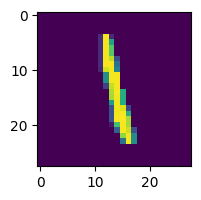

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[104])
y_train[104]


In [18]:
Model = Sequential(
    [
        Conv2D(filters = 32, kernel_size =(3,3), activation= 'relu' ,padding = 'valid', input_shape=(28,28,3) ),
        MaxPool2D(pool_size= (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size =(3,3), activation= 'relu'),
        MaxPool2D(pool_size= (2,2), strides = 2),
        # Conv2D(filters = 128, kernel_size =(3,3), activation= 'relu'),
        # MaxPool2D(pool_size= (2,2), strides = 2),
        # Conv2D(filters = 64, kernel_size =(3,3), activation= 'relu'),
        Flatten(),
        Dense(units=10, activation ='softmax'),
    ]
)

In [19]:
Model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [20]:
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'categorical_crossentropy',metrics =['accuracy'])

In [21]:
Model.fit(x=x_train,y = y_train ,validation_split=0.2, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/home/user/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/user/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/user/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/user/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/user/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/user/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "conv2d_7" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 28, 28), dtype=uint8)
      • training=True
      • mask=None
